#### Q9

Solution from Chaolun

##### 1)
a)
MPI_SSEND() is a synchronous blocking routine, which means when executing the MPI_SSEND, the thread will stall untill the matching MPI_RECEIVE has been executed. It will wait untill the message passing is finished, then the following code can be executed.

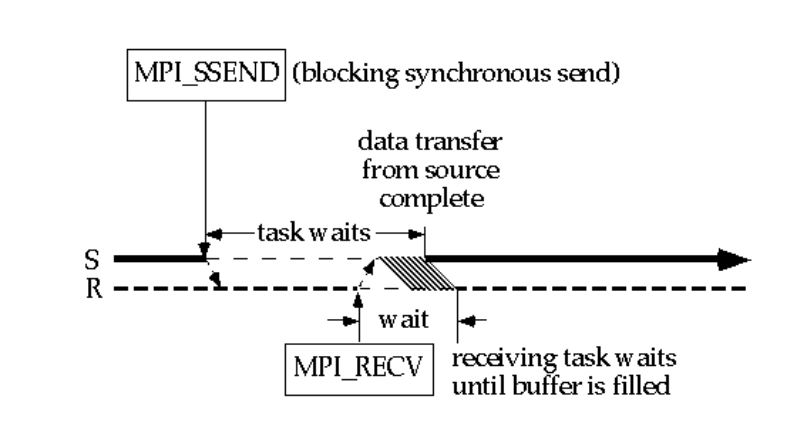

In [5]:
from IPython.display import Image
Image(filename='figure1.jpg')

b)MPI_SEND() is the standard blocking version of send routine, it has been optimized to have best performance in different situations:

When the message is small, MPI_SEND() will transfer the data into a buffer on receiver temporaly and continue the following task after transfer. 

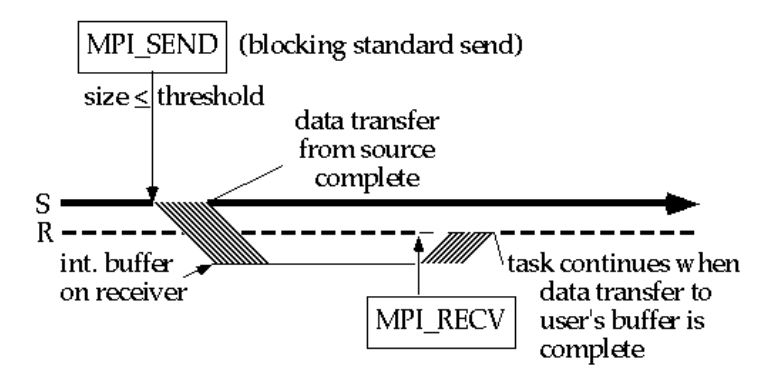

In [6]:
Image(filename='figure2.jpg')


When the message size is large, the behavior of MPI_SEND() will be exactly the same of MPI_SSEND(): it will stall untill the matching MPI_RECEIVE has been executed and the massage passing finished.

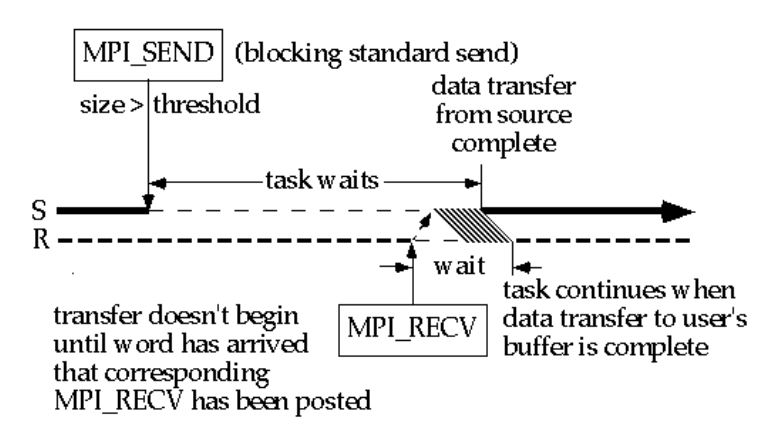

In [8]:
Image(filename='figure3.jpg')


c) MPI_ISEND(): This is a nonblocking version of send routine. It will transfer the message to the buffer on the receiver node and start the following task immediately, without waiting the transferation to be done.

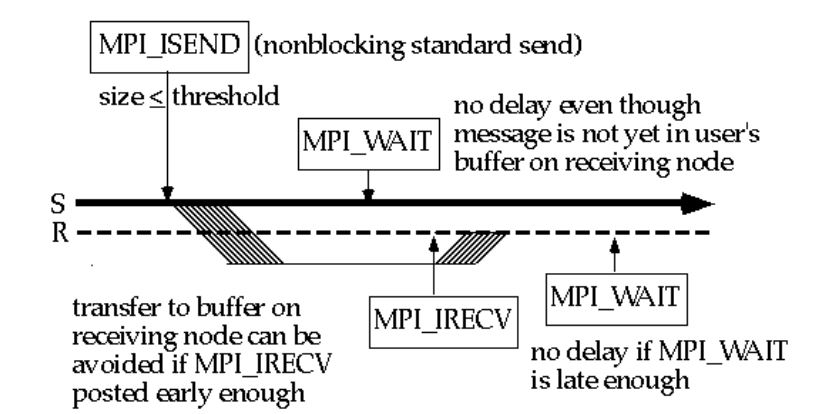

In [10]:
Image(filename='figure4.jpg')

##### 2)
When using the blocking syncronous send, if two of the threads are both executing MPI_SSend simutaneously, it will wait eachother to ececute MPI_Recv() and none of the tread will make any progress. This phenomenon is called deadlock.

To solve the problem we can change the last 3 lines use the MPI_ISend() instead(c++ version):

request=MPI::COMM_WORLD.ISend(myValue,1,MPI_INT,other_processor,0,MPI_COMM_WORLD, mpi_ierr);

MPI::COMM_WORLD.RECV(otherValue,1,MPI_INT,other_processor,0,MPI_COMM_WORLD, mpi_status, mpi_ierr);

request.Wait();

##### 3)
Firstly the receiver has been setup for the process 1-3(which will stall process 1-3 before receive message), and for the process 0, the value of token has been initialized to 100. Then the process 0 calls the send routine and send the token to process 1, which will make the process 1 release from the stall and keep on executing the send routine and send the token to process 2. Similarly, process 2 will send the token to process 3. But for process 3, it need to send the message back to process 0. So the following code called the receive routine in process 0 to receive message from process 3.



##### 4)
c++ implementation is as following:


int token, buffer;

for(i=0; i<3; i++)

{

      if(myrank==0)
  
            token=100+100*i;
    
      MPI_Barrier(MPI_COMM_WORLD);
  
  
      buffer=token
  
      request = MPI::COMM_WORLD.Irecv(token, 1, MPI::INT, myrank-1, 0);	
  
      MPI::COMM_WORLD.Send(buffer, 1, MPI::INT, myrank+1, 0);
  
      request.Wait(); 
  
      MPI_Barrier(MPI_COMM_WORLD);
  
      cout<<"Process"<<myrank<<"received token"<<token<<"from process "<<myrank-1<<'\n';
  
 }